In [2]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
with open('../res/Staphylococcus_aureus/stats_with_alignment.json') as json_file:
    stats = json.load(json_file)
genome_length = 2900155
average_read_length = 180
num_of_reads = 1294104
original_cov = float(num_of_reads*average_read_length)/genome_length

Text(0.5, 1.0, 'N-50 to cov box-plot')

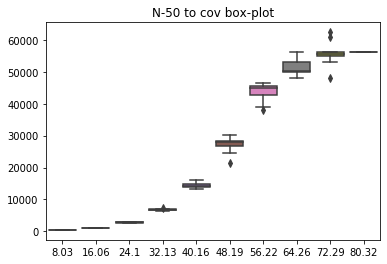

In [3]:
cov = sorted(stats.keys())
cov_fragmented = [round(float(x)*original_cov,2) for x in cov]
N50_scaffolds =list( map(lambda x:([n["Scaffold Stats"]["N50"] for n in stats[x]]), cov))
# N50_contigs = list(map(lambda x:np.mean([n["Contig Stats"]["N50"] for n in stats[x]]), cov))

# scaffolds
sns.boxplot(cov_fragmented,N50_scaffolds).set_title("N-50 to cov box-plot")
# plt.savefig(os.path.join(directory,"N50_scaff.png"))
#contigs
# plt.plot(cov, N50_contigs)
# plt.xlabel("coverage")
# plt.ylabel("N50 avg")
# plt.title("N50 per cov")
# plt.savefig(os.path.join(directory,"N50_contig.png"))

In [4]:
norm_N50 = preprocessing.normalize(N50_scaffolds)

Text(0.5, 1.0, 'normlized box-plot')

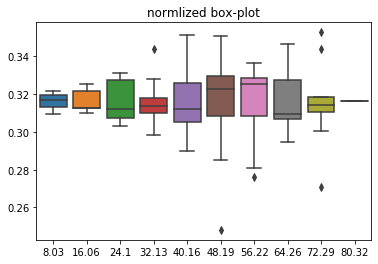

In [5]:
sns.boxplot(cov_fragmented,list(norm_N50)).set_title("normlized box-plot")



In [6]:
alined_precentage =list( map(lambda x:([n["Gene Alignment"]["total_alined_percentage"] for n in stats[x]]), cov[1:]))
flatten_aligned = [item for sublist in alined_precentage for item in sublist]
flatten_N50 = [item for sublist in N50_scaffolds[1:] for item in sublist]


Text(0.5, 1.0, 'aligned precentage to cov box-plot')

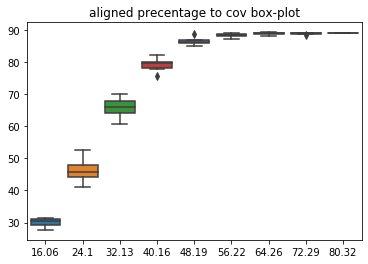

In [8]:
#box plot aligend precentage to cov
sns.boxplot(cov_fragmented[1:],alined_precentage).set_title("aligned precentage to cov box-plot")

Text(0.5, 1.0, 'normlized aligned precentage to cov box-plot')

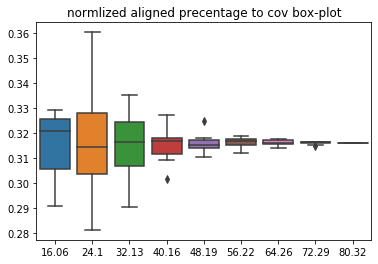

In [10]:
#box plot aligend precentage to cov
sns.boxplot(cov_fragmented[1:],list(preprocessing.normalize(alined_precentage))).set_title("normlized aligned precentage to cov box-plot")

Text(0.5, 1.0, 'aligned precentage to N50')

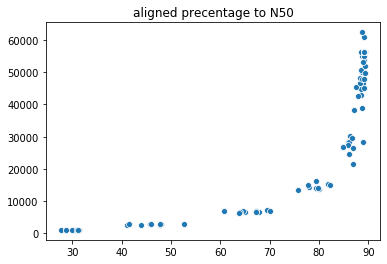

In [45]:
# scatter plot of N50 to total_alined_percentage
sns.scatterplot(flatten_aligned,flatten_N50).set_title("aligned precentage to N50")